# Evidencia de aprendizaje 2: Procesamiento de datos en una infraestructura cloud
## Maycol Alejandro Vasquez Casas
### BigData
### Grupo 61



## 1. Diseño del Esquema de Almacenamiento

El dataset contiene información sobre factores de salud y estilo de vida (`bmi`, `hba1c`, `sleep_hours_per_day`) y un indicador de diagnóstico de diabetes (`diagnosed_diabetes`). Los tipos de datos se han seleccionado para optimizar el almacenamiento y el rendimiento analítico.

### Diccionario de datos

| Columna | Tipo de Dato (Spark SQL) | Descripción | Nulabilidad (Esperada) | Categoría |
| :--- | :--- | :--- | :--- | :--- |
| **Age** | INT | Edad del participante. | TRUE | Demográfica |
| **gender** | STRING | Género del participante. | TRUE | Demográfica |
| **ethnicity** | STRING | Origen étnico del participante. | TRUE | Demográfica |
| **education_level** | STRING | Nivel de educación alcanzado. | TRUE | Socioeconómica |
| **income_level** | STRING | Nivel de ingresos (Categorizado). | TRUE | Socioeconómica |
| **employment_status** | STRING | Estado de empleo actual. | TRUE | Socioeconómica |
| **smoking_status** | STRING | Estado de fumador (Never, Former, Current). | TRUE | Estilo de Vida |
| **alcohol_consumption_per_week** | INT | Número de bebidas alcohólicas a la semana. | TRUE | Estilo de Vida |
| **physical_activity_minutes_per_week** | INT | Minutos de actividad física por semana. | TRUE | Estilo de Vida |
| **diet_score** | DOUBLE | Puntuación de la calidad de la dieta. | TRUE | Estilo de Vida |
| **sleep_hours_per_day** | DOUBLE | Horas de sueño por día. | TRUE | Estilo de Vida |
| **screen_time_hours_per_day** | DOUBLE | Horas frente a la pantalla por día. | TRUE | Estilo de Vida |
| **family_history_diabetes** | INT | Historial familiar de diabetes (1=Sí, 0=No). | TRUE | Historial Médico |
| **hypertension_history** | INT | Historial de hipertensión (1=Sí, 0=No). | TRUE | Historial Médico |
| **cardiovascular_history** | INT | Historial de enfermedad cardiovascular (1=Sí, 0=No). | TRUE | Historial Médico |
| **bmi** | DOUBLE | Índice de Masa Corporal. | TRUE | Bioquímico/Clínico |
| **waist_to_hip_ratio** | DOUBLE | Relación cintura-cadera. | TRUE | Bioquímico/Clínico |
| **systolic_bp** | INT | Presión arterial sistólica (máxima). | TRUE | Bioquímico/Clínico |
| **diastolic_bp** | INT | Presión arterial diastólica (mínima). | TRUE | Bioquímico/Clínico |
| **heart_rate** | INT | Frecuencia cardíaca en reposo. | TRUE | Bioquímico/Clínico |
| **cholesterol_total** | INT | Nivel total de colesterol. | TRUE | Bioquímico/Clínico |
| **hdl_cholesterol** | INT | Colesterol HDL ("bueno"). | TRUE | Bioquímico/Clínico |
| **ldl_cholesterol** | INT | Colesterol LDL ("malo"). | TRUE | Bioquímico/Clínico |
| **triglycerides** | INT | Nivel de triglicéridos. | TRUE | Bioquímico/Clínico |
| **glucose_fasting** | INT | Glucosa en ayunas. | TRUE | Bioquímico/Clínico |
| **glucose_postprandial** | INT | Glucosa postprandial (después de comer). | TRUE | Bioquímico/Clínico |
| **insulin_level** | DOUBLE | Nivel de insulina en suero. | TRUE | Bioquímico/Clínico |
| **hba1c** | DOUBLE | Hemoglobina glicosilada (Indicador clave de diabetes). | TRUE | Bioquímico/Clínico |
| **diabetes_risk_score** | DOUBLE | Puntuación de riesgo de diabetes (calculada). | TRUE | Resultado |
| **diabetes_stage** | STRING | Etapa de la diabetes (No Diabetes, Pre-diabetes, Type 1, Type 2). | TRUE | Resultado |
| **diagnosed_diabetes** | INT | Variable objetivo: 1 si está diagnosticado con diabetes, 0 si no. | TRUE | Objetivo/Outcome |

#### DDL Propuesto (Spark SQL - Formato Delta Lake)

Se propone utilizar **Delta Lake** como formato subyacente por sus características de transaccionalidad (ACID) y optimización en Databricks.

In [ ]:
%sql
-- DDL para la tabla Delta
-- Se utilizará esta estructura para forzar el esquema al cargar los datos.

CREATE TABLE IF NOT EXISTS diabetes_data_delta (
    Age INT,
    gender STRING,
    ethnicity STRING,
    education_level STRING,
    income_level STRING,
    employment_status STRING,
    smoking_status STRING,
    alcohol_consumption_per_week INT,
    physical_activity_minutes_per_week INT,
    diet_score DOUBLE,
    sleep_hours_per_day DOUBLE,
    screen_time_hours_per_day DOUBLE,
    family_history_diabetes INT,
    hypertension_history INT,
    cardiovascular_history INT,
    bmi DOUBLE,
    waist_to_hip_ratio DOUBLE,
    systolic_bp INT,
    diastolic_bp INT,
    heart_rate INT,
    cholesterol_total INT,
    hdl_cholesterol INT,
    ldl_cholesterol INT,
    triglycerides INT,
    glucose_fasting INT,
    glucose_postprandial INT,
    insulin_level DOUBLE,
    hba1c DOUBLE,
    diabetes_risk_score DOUBLE,
    diabetes_stage STRING,
    diagnosed_diabetes INT
) USING DELTA
OPTIONS (
  'comment' = 'Dataset de Factores de Estilo de Vida y Riesgo de Diabetes'
);

## 2. Configuración y Evidencia del Entorno
### Configuración del Clúster (Evidencia)

**Entorno de Databricks CE:****Entorno de Databricks CE:** Para configurar el entorno, seguimos los siguientes pasos, que reflejan la arquitectura de un nodo único típico en la Community Edition:

1.  Se inicia sesión en DataBricks.
2.  Se selecciona **"Compute"** en la barra lateral izquierda.
3.  Se hace clic en el botón **"Create cluster"** para iniciar la configuración.

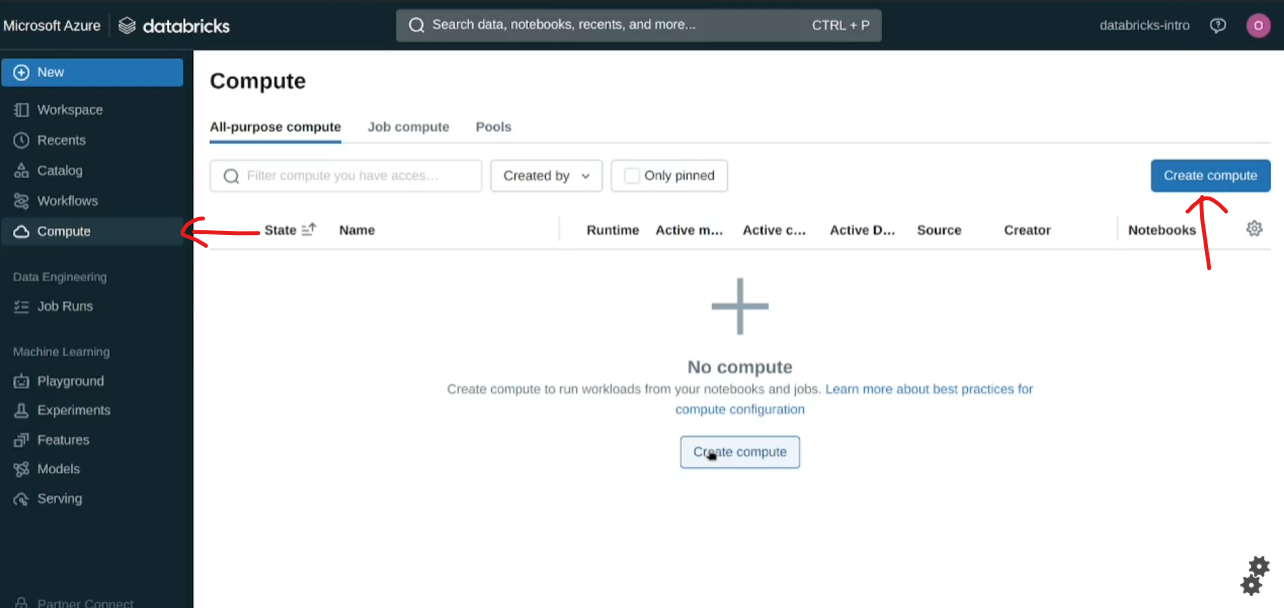

4.  Se configuran los ajustes del clúster:
    * **Cluster name:** se le da un nombre descriptivo al clúster (ej: `test`).
    * **Cluster mode:** Para Databricks CE, generalmente se usa **"Single Node"**.
    * **Databricks Runtime Version:** Se selecciona la versión que se prefiera (ej: **13.3 LTS**, que incluye Spark 3.4.1).
    * **Node type:** Se elige un tipo de instancia de máquina virtual (ej: `Standard_DS3_v2`).
    * *Nota: En "Single Node", los campos Worker type, Worker's RAM y Worker's cores no son editables o solo reflejan la configuración del nodo único.*
5.  Se da clic en el botón **"Create cluster"** para crearlo.

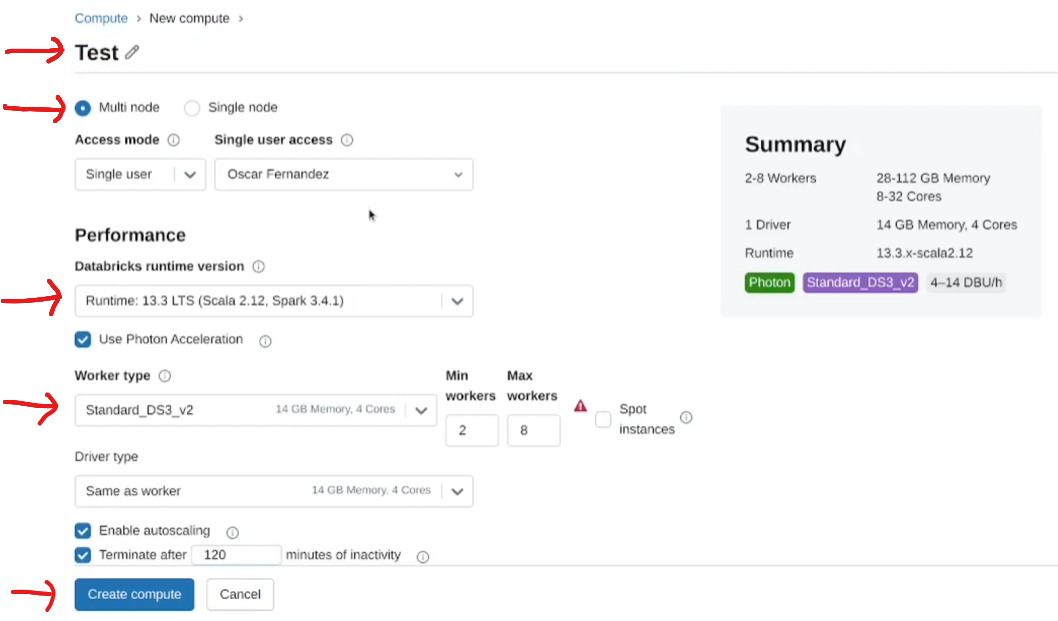


### Versiones de Python/Spark
Validamos la versión del motor de Spark y las configuraciones del contexto.

In [ ]:
# Imprimir versiones de Spark y Python

# Versión de PySpark
print(f"Versión de PySpark (Spark): {spark.version}")

# Versiones de Python (contexto)
import platform
print(f"Versión de Python: {platform.python_version()}")

Versión de PySpark (Spark): 4.0.0
Versión de Python: 3.12.3


### Estructura de Almacenamiento
Utilizaremos **DBFS (Databricks File System)** a través de la ruta `/FileStore/tables/` para almacenar el archivo CSV temporalmente.

## 3. Ingestión de Datos y Creación de Tabla

### Obtención del Dataset
El archivo `Diabetes_and_LifeStyle_Dataset.csv` se ha descargado y cargado manualmente a DBFS a través de la UI de Databricks en la ruta: `//Volumes/workspace/default/actividad2/Diabetes_and_LifeStyle_Dataset.csv`

In [ ]:
# Carga del CSV en un DataFrame aplicando inferencia de esquema
table_name = "diabetes_data_delta"
csv_file_path = "/Volumes/workspace/default/actividad2/Diabetes_and_LifeStyle_Dataset.csv"

# Cargar el archivo con encabezado y esquema inferido
df = spark.read.csv(
    csv_file_path,
    header=True,       # Incluir la primera fila como encabezado
    inferSchema=True,  # Dejar que Spark determine los tipos de datos
    sep=','
)

# Mostrar el esquema inferido y el conteo
print("Esquema Inferido (df.printSchema()):")
df.printSchema()

print(f"\nNúmero de registros cargados (df.count()): {df.count()}")

print("\nMuestra de los primeros 5 registros:")
df.limit(5).display()

Esquema Inferido (df.printSchema()):
root
 |-- Age: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- ethnicity: string (nullable = true)
 |-- education_level: string (nullable = true)
 |-- income_level: string (nullable = true)
 |-- employment_status: string (nullable = true)
 |-- smoking_status: string (nullable = true)
 |-- alcohol_consumption_per_week: integer (nullable = true)
 |-- physical_activity_minutes_per_week: integer (nullable = true)
 |-- diet_score: double (nullable = true)
 |-- sleep_hours_per_day: double (nullable = true)
 |-- screen_time_hours_per_day: double (nullable = true)
 |-- family_history_diabetes: integer (nullable = true)
 |-- hypertension_history: integer (nullable = true)
 |-- cardiovascular_history: integer (nullable = true)
 |-- bmi: double (nullable = true)
 |-- waist_to_hip_ratio: double (nullable = true)
 |-- systolic_bp: integer (nullable = true)
 |-- diastolic_bp: integer (nullable = true)
 |-- heart_rate: integer (nullable = true

Age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,7.9,7.9,0,0,0,30.5,0.89,134,78,68,239,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
52,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,6.5,8.7,0,0,0,23.1,0.8,129,76,67,116,55,50,30,93,150,2.0,5.63,23.0,No Diabetes,0
60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,10.0,8.1,1,0,0,22.2,0.81,115,73,74,213,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,6.6,5.2,0,0,0,26.8,0.88,120,93,68,171,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,7.4,5.0,0,0,0,21.2,0.78,92,67,67,210,52,125,160,137,184,12.74,7.2,23.5,Type 2,1


In [ ]:
# Persistencia del DataFrame como Tabla Delta Lake
# Usamos `saveAsTable` para crear la tabla en el catálogo de Spark.

df.write.format("delta").mode("overwrite").saveAsTable(table_name)

print(f"Tabla Delta '{table_name}' creada exitosamente en el catálogo.")

Tabla Delta 'diabetes_data_delta' creada exitosamente en el catálogo.


In [ ]:
%sql
-- Confirmación y descripción de la tabla creada (SQL)
-- Esto confirma que la tabla fue creada y nos da detalles de ubicación y formato.

-- Mostrar la descripción de la tabla
DESCRIBE DETAIL diabetes_data_delta;

format,id,name,description,location,createdAt,lastModified,partitionColumns,clusteringColumns,numFiles,sizeInBytes,properties,minReaderVersion,minWriterVersion,tableFeatures,statistics,clusterByAuto
delta,5345b36d-daa5-4133-8488-efa35e60f202,workspace.default.diabetes_data_delta,Dataset de Factores de Estilo de Vida y Riesgo de Diabetes,,2025-11-21T00:54:52.097Z,2025-11-21T01:11:26.000Z,List(),List(),1,1967335,"Map(delta.parquet.compression.codec -> zstd, option.comment -> Dataset de Factores de Estilo de Vida y Riesgo de Diabetes, delta.enableDeletionVectors -> true, delta.enableRowTracking -> true, delta.rowTracking.materializedRowCommitVersionColumnName -> _row-commit-version-col-e70f21ce-4dea-4e53-9227-544be48328d6, delta.rowTracking.materializedRowIdColumnName -> _row-id-col-1b41487d-c9fd-4b37-9c34-974681e63a4c)",3,7,"List(appendOnly, deletionVectors, domainMetadata, invariants, rowTracking)","Map(numDeletionVectors -> 0, numRowsDeletedByDeletionVectors -> 0)",false


## 4. Validaciones en Spark y SQL

Realizamos consultas equivalentes para validar la integridad de los datos y el funcionamiento del motor de consultas de Spark.

### Metadatos (Esquema)

In [ ]:
# Metadatos en Spark (PySpark)
print("Esquema (Schema) del DataFrame original:")
df.printSchema()

Esquema (Schema) del DataFrame original:
root
 |-- Age: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- ethnicity: string (nullable = true)
 |-- education_level: string (nullable = true)
 |-- income_level: string (nullable = true)
 |-- employment_status: string (nullable = true)
 |-- smoking_status: string (nullable = true)
 |-- alcohol_consumption_per_week: integer (nullable = true)
 |-- physical_activity_minutes_per_week: integer (nullable = true)
 |-- diet_score: double (nullable = true)
 |-- sleep_hours_per_day: double (nullable = true)
 |-- screen_time_hours_per_day: double (nullable = true)
 |-- family_history_diabetes: integer (nullable = true)
 |-- hypertension_history: integer (nullable = true)
 |-- cardiovascular_history: integer (nullable = true)
 |-- bmi: double (nullable = true)
 |-- waist_to_hip_ratio: double (nullable = true)
 |-- systolic_bp: integer (nullable = true)
 |-- diastolic_bp: integer (nullable = true)
 |-- heart_rate: integer (nullable = 

In [ ]:
%sql
-- Metadatos y Estructura en Spark SQL
-- DESCRIBE TABLE muestra las columnas y tipos de datos.
DESCRIBE diabetes_data_delta;

-- SHOW CREATE TABLE muestra el DDL utilizado para la creación (útil para migración).
SHOW CREATE TABLE diabetes_data_delta;

createtab_stmt
"CREATE TABLE workspace.default.diabetes_data_delta ( Age INT, gender STRING, ethnicity STRING, education_level STRING, income_level STRING, employment_status STRING, smoking_status STRING, alcohol_consumption_per_week INT, physical_activity_minutes_per_week INT, diet_score DOUBLE, sleep_hours_per_day DOUBLE, screen_time_hours_per_day DOUBLE, family_history_diabetes INT, hypertension_history INT, cardiovascular_history INT, bmi DOUBLE, waist_to_hip_ratio DOUBLE, systolic_bp INT, diastolic_bp INT, heart_rate INT, cholesterol_total INT, hdl_cholesterol INT, ldl_cholesterol INT, triglycerides INT, glucose_fasting INT, glucose_postprandial INT, insulin_level DOUBLE, hba1c DOUBLE, diabetes_risk_score DOUBLE, diabetes_stage STRING, diagnosed_diabetes INT) USING delta OPTIONS ( 'comment' = 'Dataset de Factores de Estilo de Vida y Riesgo de Diabetes') COMMENT 'Dataset de Factores de Estilo de Vida y Riesgo de Diabetes' TBLPROPERTIES ( 'delta.enableDeletionVectors' = 'true', 'delta.enableRowTracking' = 'true', 'delta.feature.appendOnly' = 'supported', 'delta.feature.deletionVectors' = 'supported', 'delta.feature.domainMetadata' = 'supported', 'delta.feature.invariants' = 'supported', 'delta.feature.rowTracking' = 'supported', 'delta.minReaderVersion' = '3', 'delta.minWriterVersion' = '7', 'delta.parquet.compression.codec' = 'zstd')"


### Descripción de Datos

In [ ]:
# Descripción de datos en Spark (PySpark)
print("Estadísticas Descriptivas para variables clave (PySpark):")
# Validamos min/max y conteo.
df.describe('Age', 'bmi', 'hba1c', 'diagnosed_diabetes').show()

Estadísticas Descriptivas para variables clave (PySpark):
+-------+------------------+------------------+------------------+-------------------+
|summary|               Age|               bmi|             hba1c| diagnosed_diabetes|
+-------+------------------+------------------+------------------+-------------------+
|  count|             97297|             97297|             97297|              97297|
|   mean|50.192698644356966| 25.61509296278401| 6.520337934365906| 0.6000390556748924|
| stddev|15.492557033521075|3.5883865034868285|0.8137102808969789|0.48989249224593545|
|    min|                19|              15.0|               4.0|                  0|
|    max|                90|              39.2|               9.8|                  1|
+-------+------------------+------------------+------------------+-------------------+



In [ ]:
%sql
-- Agregaciones en Spark SQL
-- Validación de rangos y promedios con funciones agregadas.
SELECT
    COUNT(*) AS total_registros,
    AVG(bmi) AS promedio_bmi,
    MAX(hba1c) AS maximo_hba1c,
    MIN(Age) AS edad_minima
FROM diabetes_data_delta;

total_registros,promedio_bmi,maximo_hba1c,edad_minima
97297,25.61509296278406,9.8,19


### Consultas SELECT y GROUP BY (Validación Cruzada)
Validamos un caso de uso común: el conteo de diagnósticos de diabetes agrupado por género.

In [ ]:
# GROUP BY en Spark (PySpark)
from pyspark.sql.functions import avg, col

print("Conteo de Diabetes Diagnosticada (diagnosed_diabetes=1) por Género (PySpark):")
df.filter(col('diagnosed_diabetes') == 1).groupBy('gender').count().show()

Conteo de Diabetes Diagnosticada (diagnosed_diabetes=1) por Género (PySpark):
+------+-----+
|gender|count|
+------+-----+
|Female|29247|
| Other| 1226|
|  Male|27909|
+------+-----+



In [ ]:
%sql
-- GROUP BY en Spark SQL (Equivalente)
SELECT
    gender,
    COUNT(*) AS count
FROM diabetes_data_delta
WHERE diagnosed_diabetes = 1
GROUP BY gender;

gender,count
Male,27909
Female,29247
Other,1226


## 5. Análisis de Ventajas y Desventajas: SQL vs Spark (PySpark)

La elección entre la API de SQL y la API de DataFrames/PySpark depende del usuario, el contexto de la tarea, y la complejidad del pipeline.

| Aspecto | SQL (Spark SQL) | Spark (PySpark/Scala API) |
| :--- | :--- | :--- |
| **Ventajas** | **1. Facilidad de Uso:** Lenguaje declarativo estándar, resulta más faciles realizar las consultas cuando se sabe un poco de SQL. | **1. Escalabilidad y Control:** Acceso directo a configuraciones de Spark (RDDs, particionamiento). |
| | **2. Integración BI/Reporting:** Se conecta fácilmente con herramientas de Business Intelligence. | **2. Pipelines Complejos:** Permite lógica iterativa, condicional y programación de flujo de control. |
| | **3. Optimización Automática:** El optimizador Catalyst de Spark funciona muy bien con consultas SQL. | **3. Ecosistema de ML:** Integración nativa y fluida con **MLlib** (Machine Learning Library). |
| **Desventajas** | **1. Limitación Funcional:** Más difícil de implementar lógica compleja o UDFs personalizados. | **1. Curva de Aprendizaje:** Requiere conocimiento de Python/Scala y la API de DataFrames. |
| | **2. Flujo Imperativo:** No es ideal para pipelines que requieren lógica condicional o iterativa. | **2. Verbose:** Las operaciones simples pueden requerir más código que una sola sentencia SQL, lo cual lo hace un poco complicado. |
| | **3. Debugging de UDFs:** Las funciones definidas por el usuario (UDFs) en SQL pueden ser menos eficientes. | **3. Debugging:** Puede ser más complejo debido a la naturaleza distribuida. |